# **Ракета**
> Визуализировать полет ракеты, определить время полёта при падении на землю и представить графики зависимости кинематических характеристик. Учесть движение ракеты при сгорании топлива.

# Задачи, которые мы должны выполнить:
  1. Сделать полный график полета ракеты с помощью полученных координат
  2. Сделать графики скорости по оси X и Y
  3. Сделать график массы топлива (его сгорания)

> Ход выполнения работы: проводим подсчет изменения скоростей, высчитываем новый угол ракеты, после этого считаем новые координаты ракеты.



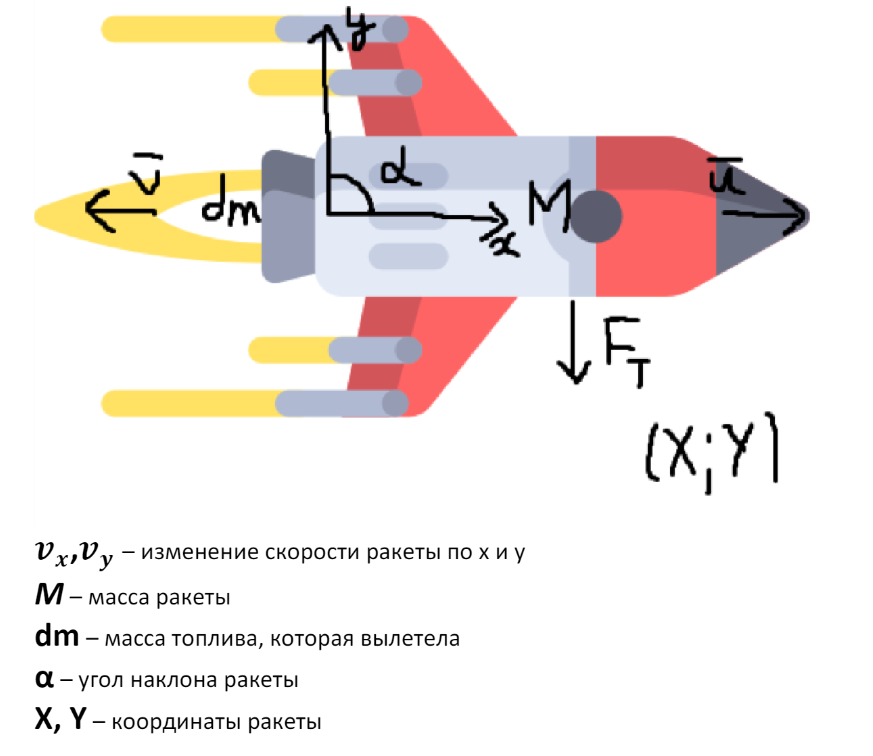

# Формулы

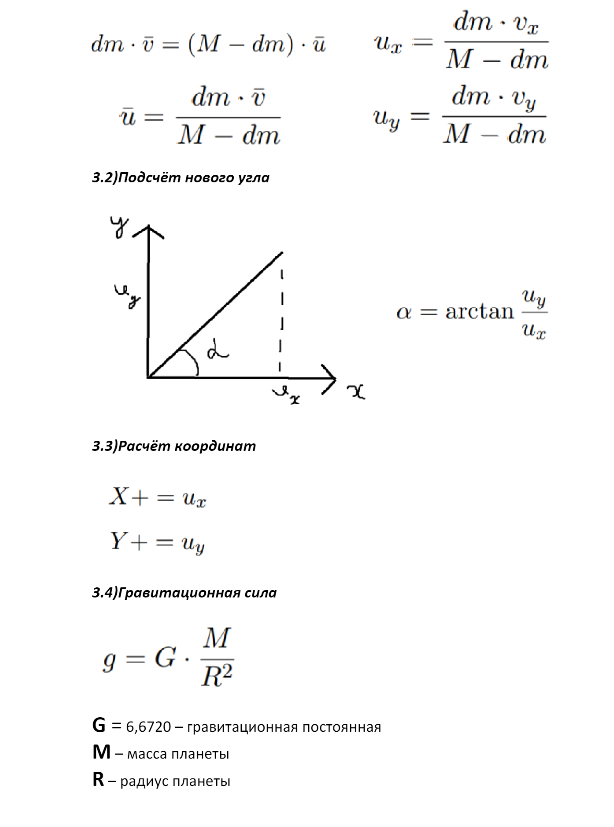

Введите массу ракеты: 500
Введите массу топлива: 40
Введите скорость истечения газа: 250
Введите скорость сжигания топлива: 80
Введите стартовый угол: 10


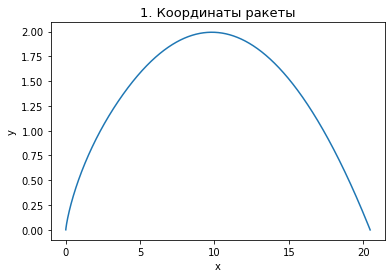

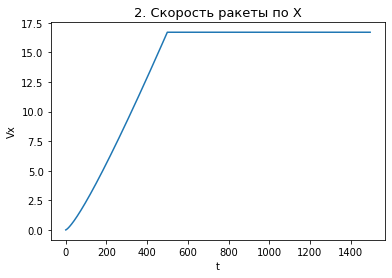

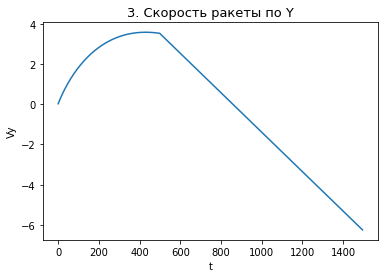

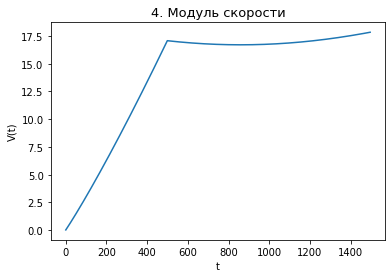

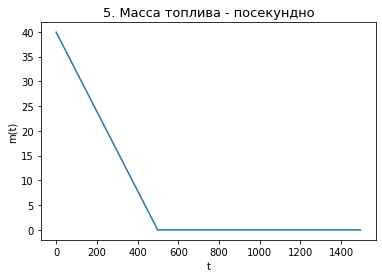

In [ ]:
import math
import matplotlib.pyplot as plt

M_r = int(input("Введите массу ракеты: "))
M_t = int(input("Введите массу топлива: "))
u = int(input("Введите скорость истечения газа: "))
alpha = int(input("Введите скорость сжигания топлива: "))
teta = int(input("Введите стартовый угол: "))

Mearth = 5.972e+24                 # масса Земли
R = 6371 * 10 ** 3                 # радиус Земли
g0 = 6.67e-11 * Mearth / (R ** 2)  # ускорение свободного падения

x, y = 0, 0     # начальные координаты по оси Ox и Oy
v = 0           # скорость   
m = M_t + M_r   # масса

V_x, V_y = 0, 0 # скорость (В данном случае начальная, т.е нулевая)

# листы для графиков
plot_m, plot_v, plot_x, plot_y = [], [], [], []
plot_V_x, plot_V_y = [], []
h = 0.001

i = 0

# вычисления процесса полета ракеты
while y >= 0:
    g = g0 * R * R / ((R + y) * (R + y))

    if m - M_r > 0:
        V_x += math.sin(teta * math.pi / 180) * u * alpha * h / (m - alpha * h)  # вычисление скрости по Ox
        V_y += math.cos(teta * math.pi / 180) * u * alpha * h / (m - alpha * h)  # вычисление скорости по Oy
        m -= alpha * h # изменение общей массы ракеты
    V_y -= g * h


    if V_x != 0:
        teta = math.atan2(V_y, -V_x) * 180 / math.pi - 90 # изменение угла наклона ракеты

    else:
        if V_y >= 0:
            teta = 0
        else:
            teta = 180

    x += V_x * h
    y += V_y * h

    # полученная информация, требуемая для построения графиков 
    plot_m.append(m - M_r)
    plot_v.append(math.sqrt(V_x ** 2 + V_y ** 2))
    plot_x.append(x)
    plot_y.append(y)
    plot_V_x.append(V_x)
    plot_V_y.append(V_y)
    i += 1

tg = [_ for _ in range(i)]

# построение графиков 
plt.plot(plot_x, plot_y)
plt.title('1. Координаты ракеты', fontsize=13)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(tg, plot_V_x)
plt.title('2. Скорость ракеты по X', fontsize=13)
plt.xlabel("t")
plt.ylabel("Vx")
plt.show()

plt.plot(tg, plot_V_y)
plt.title('3. Скорость ракеты по Y', fontsize=13)
plt.xlabel("t")
plt.ylabel("Vy")
plt.show()

plt.plot(tg, plot_v)
plt.title('4. Модуль скорости', fontsize=13)
plt.xlabel("t")
plt.ylabel("V(t)")
plt.show()

plt.plot(tg, plot_m)
plt.title('5. Масса топлива - посекундно', fontsize=13)
plt.xlabel("t")
plt.ylabel("m(t)")
plt.show()
